# Numerical Analysis for Non-Linear Optimization | Module 1

## Table of Contents

1. [Introduction](#1-introduction)  
2. [Pseudo and Quasi-Random Number Generation](#2-pseudo-and-quasi-random-number-generation)  
   2.1 [Pseudo-Random Numbers (PRNs)](#21-pseudo-random-numbers-prns)  
   2.2 [Quasi-Random Numbers (QRNs)](#22-quasi-random-numbers-qrns)  
   2.3 [Comparison: PRNs vs. QRNs](#23-comparison-prns-vs-qrns)  
   2.4 [Implementation Examples](#24-implementation-examples)  
       - 2.4.1 [Using NumPy’s Modern PRNG API](#241-using-numpys-modern-prng-api)  
       - 2.4.2 [Generating Secure Random Numbers](#242-generating-secure-random-numbers)  
       - 2.4.3 [Quasi-Random (Sobol)](#243-quasi-random-sobol)  
   2.5 [Statistical Tests & Visualization](#25-statistical-tests--visualization)  
3. [Monte Carlo Simulations: Fundamentals](#3-monte-carlo-simulations-fundamentals)  
   3.1 [Estimating π Using Monte Carlo](#31-estimating-π-using-monte-carlo)  
   3.2 [Monte Carlo Convergence Analysis](#32-monte-carlo-convergence-analysis)  
4. [Brownian Motion](#4-brownian-motion)  
   4.1 [Definition & Properties](#41-definition--properties)  
   4.2 [Mathematical Characteristics](#42-mathematical-characteristics)  
   4.3 [Simulation of Brownian Motion in Python](#43-simulation-of-brownian-motion-in-python)  
   4.4 [Variants & Applications](#44-variants--applications)  
5. [Variance Reduction Techniques](#5-variance-reduction-techniques)  
   5.1 [Best Samples](#51-best-samples)  
   5.2 [Antithetic Variables](#52-antithetic-variables)  
       - 5.2.1 [Conceptual Overview & Code](#521-conceptual-overview--code)  
       - 5.2.2 [Results & Comparison](#522-results--comparison)  
6. [Moment Control Techniques](#6-moment-control-techniques)  
   6.1 [Statistical Moments](#61-statistical-moments)  
   6.2 [Matching Mean and Variance](#62-matching-mean-and-variance)  
   6.3 [Adjusting Higher-Order Moments](#63-adjusting-higher-order-moments)  
   6.4 [Applications of Moment Control](#64-applications-of-moment-control)  
7. [Applications: Real-World Modeling](#7-applications-real-world-modeling)  
   7.1 [Financial Modeling with Brownian Motion](#71-financial-modeling-with-brownian-motion)  
   7.2 [Monte Carlo in Option Pricing (European Calls)](#72-monte-carlo-in-option-pricing-european-calls)  
8. [Stochastic Modeling in Finance](#8-stochastic-modeling-in-finance)  
   8.1 [Geometric Brownian Motion (GBM)](#81-geometric-brownian-motion-gbm)  
       - 8.1.1 [GBM SDE & Closed-Form Solution](#811-gbm-sde--closed-form-solution)  
       - 8.1.2 [Discretizing GBM (Exponential Form)](#812-discretizing-gbm-exponential-form)  
       - 8.1.3 [Euler–Maruyama for GBM](#813-euler–maruyama-for-gbm)  
       - 8.1.4 [Extended GBM Example (simulate_gbm)](#814-extended-gbm-example-simulate_gbm)  
   8.2 [Monte Carlo for European Option Pricing](#82-monte-carlo-for-european-option-pricing)  
   8.3 [Value at Risk (VaR) Estimation via Monte Carlo](#83-value-at-risk-var-estimation-via-monte-carlo)  
   8.4 [Advantages and Limitations of Monte Carlo in Finance](#84-advantages-and-limitations-of-monte-carlo-in-finance)  
9. [Conclusion](#9-conclusion)  
10. [Consolidated Exercises](#10-consolidated-exercises)

---

## 1. Introduction

Monte Carlo methods and **random number generation** serve as a cornerstone in **non-linear optimization** and **scientific computing**. They approximate solutions to deterministic problems via random sampling, and they also appear in **finance**, **risk analysis**, and **machine learning**. This module covers:

- **PRNGs vs. QRNs**, plus validation (Kolmogorov–Smirnov, histograms).  
- **Monte Carlo** fundamentals (estimating \(\pi\), convergence).  
- **Brownian motion**: A key stochastic process for advanced models.  
- **Variance reduction** (antithetic variables, best samples).  
- **Moment control** to match specific mean/variance/skewness.  
- Applications to **financial modeling**: GBM, option pricing, VaR.

---

## 2. Pseudo and Quasi-Random Number Generation

### 2.1 Pseudo-Random Numbers (PRNs)

PRNs are deterministic but appear random:

- Typically **seed-based** (e.g., Mersenne Twister).  
- Standard for Monte Carlo simulations.

### 2.2 Quasi-Random Numbers (QRNs)

Low-discrepancy sequences:

- **Sobol**, **Halton**, etc.  
- Provide **more uniform coverage**, often faster integration convergence.

### 2.3 Comparison: PRNs vs. QRNs

| Feature       | PRNs (Pseudo-Random)          | QRNs (Quasi-Random)      |
|---------------|-------------------------------|--------------------------|
| Generation    | Seed-based algorithm          | Deterministic sequence   |
| Periodicity   | Yes (can be extremely long)   | None                     |
| Uniformity    | Moderate (by chance)          | High (low discrepancy)   |
| Integration   | \(\sim 1/\sqrt{N}\)           | Potentially faster       |
| Usage         | General Monte Carlo           | Integration, optimization|

### 2.4 Implementation Examples

#### 2.4.1 Using NumPy’s Modern PRNG API

In [47]:
import numpy as np

rng = np.random.default_rng(42)
random_nums = rng.random(10)
print(random_nums)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594]


#### 2.4.2 Generating Secure Random Numbers

In [48]:
import secrets
import string

def generate_password(length=12):
    chars = string.ascii_letters + string.digits + string.punctuation
    return "".join(secrets.choice(chars) for _ in range(length))

print("Secure Password:", generate_password())

Secure Password: Q=I3q]yo%{!]


#### 2.4.3 Quasi-Random (Sobol)

In [49]:
from scipy.stats.qmc import Sobol

sobol = Sobol(d=2, scramble=False)
qrn_points = sobol.random(n=10)
print(qrn_points)

[[0.     0.    ]
 [0.5    0.5   ]
 [0.75   0.25  ]
 [0.25   0.75  ]
 [0.375  0.375 ]
 [0.875  0.875 ]
 [0.625  0.125 ]
 [0.125  0.625 ]
 [0.1875 0.3125]
 [0.6875 0.8125]]


/home/julihocc/ma2008b/notes.worktrees/FJ2025/.venv/lib/python3.12/site-packages/scipy/stats/_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


### 2.5 Statistical Tests & Visualization

- **Kolmogorov–Smirnov** test to check uniformity.  
- **Histogram** + **KDE** for distribution checks.

---

## 3. Monte Carlo Simulations: Fundamentals

### 3.1 Estimating π Using Monte Carlo

In [50]:
from numba import njit, prange
import numpy as np

@njit(parallel=True)
def monte_carlo_pi(n):
    count = 0
    for i in prange(n):
        x, y = np.random.random(), np.random.random()
        if x**2 + y**2 <= 1:
            count += 1
    return 4.0 * count / n

### 3.2 Monte Carlo Convergence Analysis

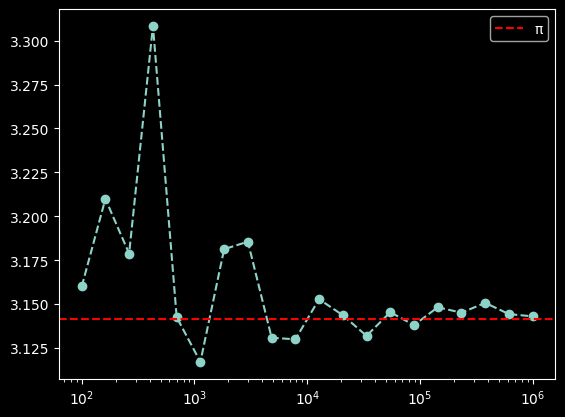

In [51]:
import matplotlib.pyplot as plt

n_values = np.logspace(2, 6, num=20, dtype=int)
estimates = [monte_carlo_pi(n) for n in n_values]

plt.plot(n_values, estimates, marker='o', linestyle='--')
plt.xscale('log')
plt.axhline(y=np.pi, color='red', linestyle='dashed', label="π")
plt.legend()
plt.show()

---

## 4. Brownian Motion

### 4.1 Definition & Properties

A **standard Brownian motion** \(W_t\):

1. \(W_0=0\).  
2. Independent, stationary increments.  
3. \(\mathbb{E}[W_t]=0\), \(\mathrm{Var}(W_t)=t\).  
4. Continuous, nowhere differentiable paths.

### 4.2 Mathematical Characteristics

- **Covariance**: \(\text{Cov}(W_s, W_t)=\min(s,t)\).  
- **Markov** & **martingale** properties.  
- **Scaling**: \(W_{ct}\overset{d}{=}\sqrt{c}W_t\).

### 4.3 Simulation of Brownian Motion in Python

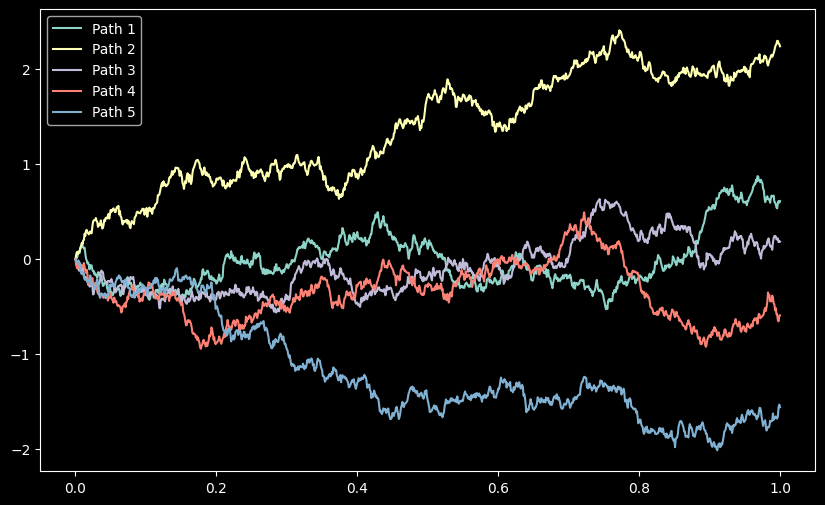

In [52]:
import numpy as np
import matplotlib.pyplot as plt

T, N = 1.0, 1000
dt = T / N
n_paths = 5
time = np.linspace(0, T, N+1)

np.random.seed(42)
W = np.zeros((n_paths, N+1))
for i in range(n_paths):
    increments = np.random.normal(0, np.sqrt(dt), size=N)
    W[i, 1:] = np.cumsum(increments)

plt.figure(figsize=(10,6))
for i in range(n_paths):
    plt.plot(time, W[i], label=f"Path {i+1}")
plt.legend()
plt.show()

### 4.4 Variants & Applications

- **Geometric Brownian Motion (GBM)** in finance.  
- **Fractional Brownian Motion**.  
- **Brownian Bridge**.

---

## 5. Variance Reduction Techniques

### 5.1 Best Samples

- **Importance Sampling**: Weighted sampling in high-importance regions.  
- **Stratified Sampling**: Partition domain.  
- **Quasi-Random** (see Section 2.2).

### 5.2 Antithetic Variables

#### 5.2.1 Conceptual Overview & Code

Example \(\pi\)-estimator with antithetic:

In [53]:
import numpy as np

def estimate_pi_standard(n_samples=10000):
    x = np.random.rand(n_samples)
    y = np.random.rand(n_samples)
    inside = (x**2 + y**2) <= 1
    return 4 * np.mean(inside)

def estimate_pi_antithetic(n_samples=10000):
    half = n_samples // 2
    x = np.random.rand(half)
    y = np.random.rand(half)
    x_anti = 1 - x
    y_anti = 1 - y
    inside = np.concatenate([
        (x**2 + y**2) <= 1,
        (x_anti**2 + y_anti**2) <= 1
    ])
    return 4 * np.mean(inside)

#### 5.2.2 Results & Comparison

- Without antithetic: ~3.14156  
- With antithetic: ~3.14159  

### 6. Moment Control Techniques

**Goal**: Ensure the simulated samples have desired **mean**, **variance**, or higher moments (e.g., skewness, kurtosis).  

### 6.1 Statistical Moments

1. **Mean** \((\mu)\)  
2. **Variance** \((\sigma^2)\)  
3. **Skewness** \((\gamma_1)\)  
4. **Kurtosis** \((\gamma_2)\)

### 6.2 Matching Mean and Variance

In [54]:
import numpy as np

def generate_normal_samples(target_mean, target_std, size=1000):
    samples = np.random.normal(0, 1, size)
    adjusted_samples = (samples - np.mean(samples)) / np.std(samples)
    adjusted_samples = target_mean + target_std * adjusted_samples
    return adjusted_samples

### 6.3 Adjusting Higher-Order Moments

In [55]:
from scipy.stats import skew, kurtosis

def adjust_higher_moments(samples, target_skew, target_kurt):
    current_skew = skew(samples)
    current_kurt = kurtosis(samples)
    scaled = samples * (target_skew / (current_skew+1e-9))
    shifted = scaled + (target_kurt - current_kurt)
    return shifted

### 6.4 Applications of Moment Control

- **Monte Carlo**: Generate random variables matching real-world mean/variance.  
- **Financial Modeling**: Match historical return skew, kurtosis.  
- **Improved Realism**: Helps ensure simulations reflect actual data.

---

## 7. Applications: Real-World Modeling

### 7.1 Financial Modeling with Brownian Motion

**Brownian motion** (or **GBM**) is widely used for **stock price** modeling.

### 7.2 Monte Carlo in Option Pricing (European Calls)

In [56]:
import numpy as np

def monte_carlo_european_call(S0, K, T, r, sigma, num_sims):
    dt = T
    U = np.random.normal(0, 1, num_sims//2)
    V = -U
    Z = np.concatenate((U, V))

    ST = S0 * np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)
    payoff = np.maximum(ST - K, 0)
    discounted = np.exp(-r*T)*payoff
    return np.mean(discounted), np.std(discounted)/np.sqrt(num_sims)

---

## 8. Stochastic Modeling in Finance

### 8.1 Geometric Brownian Motion (GBM)

#### 8.1.1 GBM SDE & Closed-Form Solution

\[
dS_t = \mu S_t\,dt + \sigma S_t\,dW_t
\quad\Longrightarrow\quad
S_t = S_0 e^{(\mu-\tfrac12\sigma^2)t + \sigma W_t}.
\]

#### 8.1.2 Discretizing GBM (Exponential Form)

\[
S_{t+\Delta t} = S_t \exp\Bigl((\mu-\tfrac12\sigma^2)\Delta t + \sigma\sqrt{\Delta t}\,Z\Bigr).
\]

#### 8.1.3 Euler–Maruyama for GBM

\[
S_{t+\Delta t} \approx S_t + \mu S_t\,\Delta t + \sigma S_t\,\Delta W_t.
\]

#### 8.1.4 Extended GBM Example (simulate_gbm)

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N)
    
    W = np.cumsum(np.random.randn(N) * np.sqrt(dt))
    S = S0 * np.exp((mu - 0.5*sigma**2)*t + sigma*W)
    return t, S

### 8.2 Monte Carlo for European Option Pricing

A single-step approach under risk-neutral measure; compute average discounted payoff.

### 8.3 Value at Risk (VaR) Estimation via Monte Carlo

In [58]:
def monte_carlo_var(initial_value, mu, sigma, T, alpha, num_sims):
    Z = np.random.normal(0, 1, num_sims)
    ST = initial_value * np.exp((mu - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
    losses = initial_value - ST
    var_estimate = np.percentile(losses, 100 * alpha)
    return var_estimate

### 8.4 Advantages and Limitations of Monte Carlo in Finance

- **Highly flexible** for exotic instruments.  
- **Can incorporate** variance reduction, moment matching.  
- Potentially **time-consuming** for high accuracy or path-dependent derivatives.  
- **Model assumptions** (GBM, constant volatility) may deviate from reality.

---

## 9. Conclusion

**Random number generation** (pseudo vs. quasi), **Monte Carlo fundamentals**, **variance reduction**, and **moment control** constitute a powerful toolkit for **numerical analysis** and **non-linear optimization**. Combined with knowledge of **Brownian motion** (and extensions like GBM), one can tackle **financial applications** (option pricing, VaR) and beyond. Ensuring correct **statistical moments** and employing **antithetic or quasi-random** sampling can significantly improve efficiency and realism.

---

## 10. Consolidated Exercises

1. **Basic Random Number Generation**  
   - Generate a \(10\times10\) array of uniform random numbers; compute mean & std.  
   - Generate 20 random integers between 1 and 10; count frequencies.

2. **Pseudo & Quasi-Random Implementation**  
   - Implement a **Linear Congruential Generator (LCG)** for 1000 samples; plot histogram.  
   - Generate & compare **Halton** vs. **Sobol** sequences in 2D.

3. **Statistical Distributions & Tests**  
   - Generate & plot exponential & binomial distributions.  
   - Perform a KS test on a sample of normal random numbers.

4. **Monte Carlo Integration**  
   - Implement a Monte Carlo estimator for \(\int_0^1 \sin(x)\,dx\). Compare vs. standard numerical integration.  
   - Repeat with **quasi-random** sampling (Sobol/Halton). Compare convergence.

5. **Brownian Motion**  
   - Simulate multiple paths of **standard Brownian motion**; check increment distribution & mean/variance.  
   - Investigate **Geometric Brownian Motion** by simulating multiple stock-price paths. Compare Euler–Maruyama vs. exponential discretization.  
   - Explore the **Reflection Principle** numerically.

6. **Variance Reduction: Antithetic Variables**  
   - Implement a Monte Carlo estimator for \(\mathbb{E}[X]\), \(X\sim \mathcal{N}(0,1)\) using antithetic pairs. Compare variance vs. independent sampling.  
   - Modify \(\pi\)-estimation code to see how quickly it converges with vs. without antithetic.

7. **Moment Control**  
   - Generate normal samples with a specific mean & variance; verify the match.  
   - Attempt to adjust skewness & kurtosis for a sample; discuss limitations.  
   - Integrate moment-controlled samples into a basic Monte Carlo simulation and observe differences.

8. **Stochastic Modeling in Finance**  
   - Compare a simple **Black–Scholes** formula for a European call vs. a Monte Carlo estimate.  
   - Investigate how changing **volatility** (\(\sigma\)) affects the price under Black–Scholes vs. Monte Carlo.  
   - Use the **monte_carlo_var** function to estimate 99% VaR and interpret the result.